<center>
    <div style="color:black; border-bottom: 1px solid #d9d9d9;
    display: inline-block;
    color: #dc143c;
    padding: 2px">
        <font size=5>The Prediction of Burned Area by Forest Fires</font>
    </div>
    <br>
</center>
<center>Qinglin Mao<center/>
<center>2034891<center/>

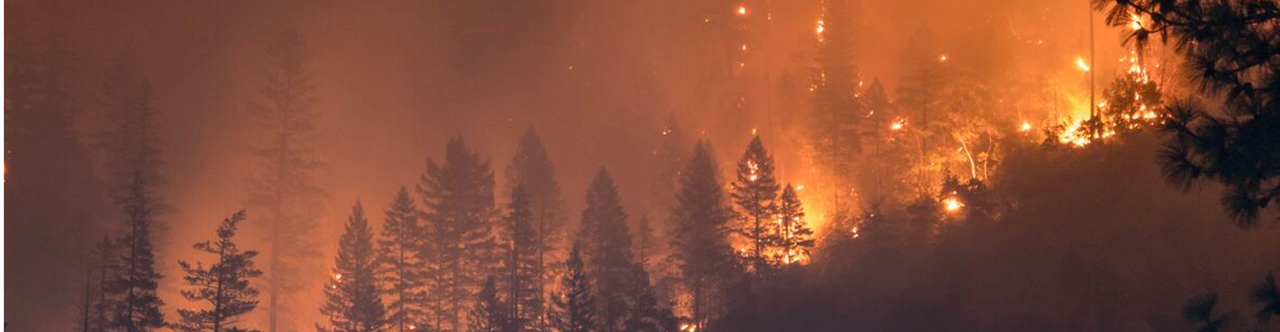

Note:
* Running Environment need to include: matplotlib,numpy,pandas,seaborn,sklearn,imblearn.
* There is variable reuses in the code. Thus, attention to the context when running the code block.

# Introduction
* Forest fires can destroy the local natural environment and endanger the human being. While these happening of fires were not due to nature such as lightning, rotting of leaves, etc., but human activities. Forest firs detection methods are important on fire-controls. 
* In this study, A *regression* methods of the burned area by forest fires were built to achieve fires detections based on the data 
* The original data includes *Weather Conditions*, indexes of *Fires Altering System*, *Location Coordinates* and the output attributes, burned *Area*, was predicted by SVR and SVC with *Data Discretization*. 

# Related Work

A variety of gases and particles produced during a fire can be detected by sensors. Therefore, in real life, it is a common way to use sensors to detect fires, such as smoke sensors[9]. In this paper[9], a distributed neural network and naive Bayes model were used to detect the fires, and the accuracy of detection was over 92% for wildfire.\
The dataset used in this experiment was firstly in the paper[7],*A Data Mining Approach to Predict Forest Fires using Meteorological Data*. In this paper, the researcher used machine learning models to predict burned area, and they also used the logarithm transform, ln(x+1) function, to change the situation that the output variable is very skewed towards 0. MAD and RMSE measured the performance of the models. The best models mentioned in this paper are:
* A Gaussian support vector machine (SVM) fed with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:12.71 +- 0.01
* The best RMSE was attained by the naive mean predictor.

In order to have a comparison with the results of this paper, I also used the SVM model for prediction, using MAD and RMSE as measurement methods. At the same time, I established a baseline model based on *the best MAD model* that using A SVM model with only 4 direct weather conditions (temp, RH, wind and rain).
In this paper[7], only one method, ln(x+1) function, were used, so in this experiment, more feature engineering methods will be tested to improve the performance of models.

# Problem Formulation 
The burned *area* was predicted by machine learning models that fitted with *Forest Fires Dataset*.
* The dataset was provided by *UCI Machine Learning resporities* in 2008-02-29.https://archive.ics.uci.edu/ml/datasets/Forest+Fires
* There were 12 input-attributes and 1 output-attributes,including:Weather conditions,Location coordinates,Timestemp,Indexes from Fire Weather Index system and Destroyed area (output)
* 517 samples totally were split in the training-set (70%) and testing-set (30%)


Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

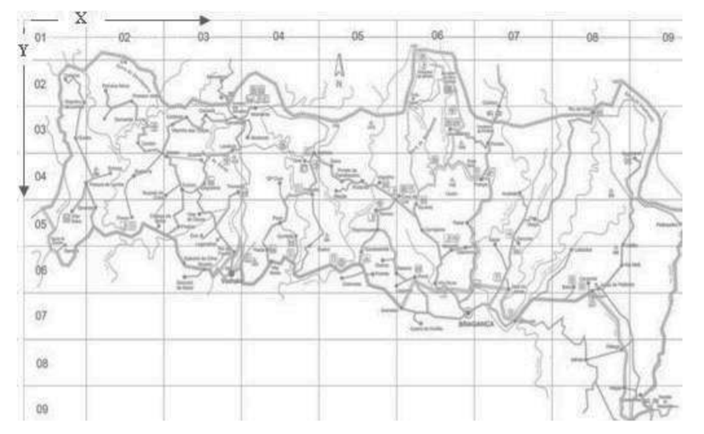
<center> The map of the Montesinho natural park[7] </center>

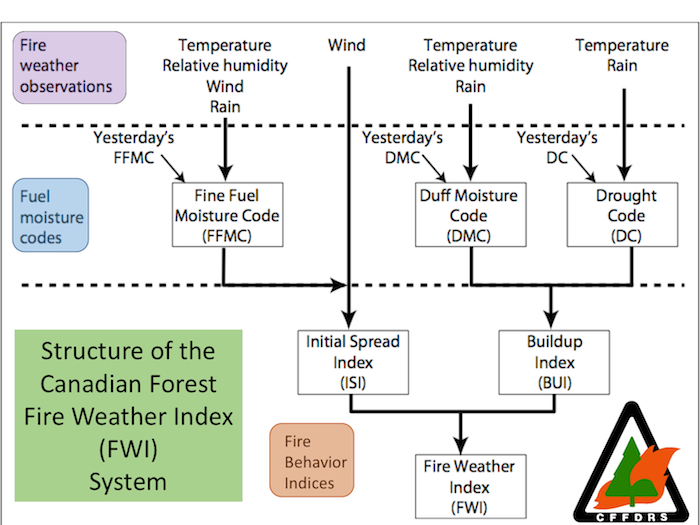
<center>FWI Process Flow Chart.(Cited from https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)

In [1]:
# Download Dataset
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

r = requests.get(url, stream=True)
f = open("forestfires.csv", "wb")
for chunk in r.iter_content(chunk_size=512):
    if chunk:
        f.write(chunk)
f.close()

In [2]:
# Load Dataset
import pandas as pd
data = pd.read_csv('forestfires.csv')
data.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

## Preprocessing
The original attributes, *Month* and *Day*, were innumerical, then they were replaced by numbers.

In [3]:
data.replace({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7},inplace=True)
data.replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,
              'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
data.head()

X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

## Features enginnering methods
These methods were used in this experiments:
* Logarithmic Function
* One-hot Encoding
* Polynomia Features
* StandardScaler
* PCA
* REF
* Manual Feature Creation: Holiday and Weekend
* Data Discretization (KMeans)

# Methods

## Models
### Introduction of SVR & SVC 
This is a regression task that the *Support Vector Regression*(SVR) was used as well as the *Support Vector Classification*(SVC) with Data Discretization through *K-means*.There models were with *Linear* kernal.\
The SVR is aiming to find the best hyperplane that has the lowest sum of distance between points and plane.While, the SVC is aiming to find a hyperplane that has the fatthest distance from the points on the boundary to the plane[5].
The loss function used by these models was *Hinge Loss*.
$$
\begin{array}{l}
z=y^{(i)}\left(w \cdot x^{(i)}+\alpha\right) \\
L_{h}(z)=\left\{\begin{array}{cl}
0 & \text { if } z \geq 1 \\
1-z & \text { if } z<1
\end{array}\right.
\end{array}
$$
And the object function is that:
$$
J(w, \alpha)=\frac{1}{n} \sum_{i=1}^{n} L_{h}\left(y^{(i)}\left(w \cdot x^{(i)}+\alpha\right)\right)+\frac{\lambda}{2}\|w\|^{2}
$$

Sometimes, the dataset is not linearly separable, thus a lack variables $\xi$ is included in.
$$
y^{(i)}\left(w \cdot x^{(i)}+\alpha\right) \geq 1-\xi_{i}
$$

### Metric Methods
To measure the performance of the model,Mean Absolute Deviation (MAD) and Root Mean Squared (RMSE) were used in this experiment, which calucate the distance between predicted results and actuals.


Mean Absolute Deviation (MAD)
$$MAD = 1/N \times \sum_{i=1}^{N} \mid y_i - y_{pred} \mid  $$
Root Mean Squared (RMSE)
$$RMSE = \sqrt {  \sum_{i=1}^{N} ( y_i - y_{pred} )^2/N}  $$


### Processes of Training and Prediction
The figure below shows the process of the whole process from data processing to fitting models.
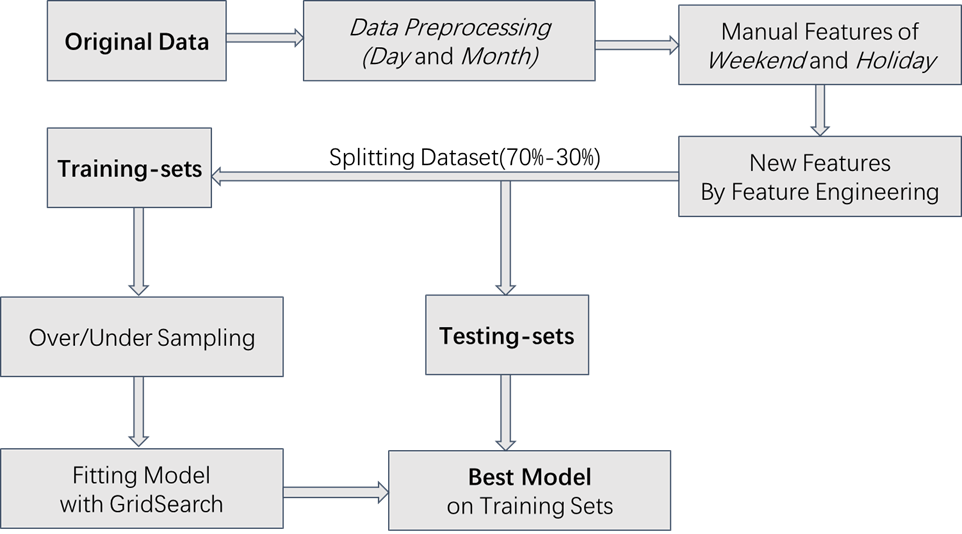

### The Difference of Processes Between SVR and SVC
There are some differences in processing when using SVC models to achieve the regression task. The figure below shows how the SVR and SVC models predicted the burned area.
the processes of two methods of SVC and SVR.\
When using SVC models, the area was discretized by K-means, then the labels of clusters fitted by the SVC model as explained attributes. The predicted area is the centre value of the relative cluster of the label.

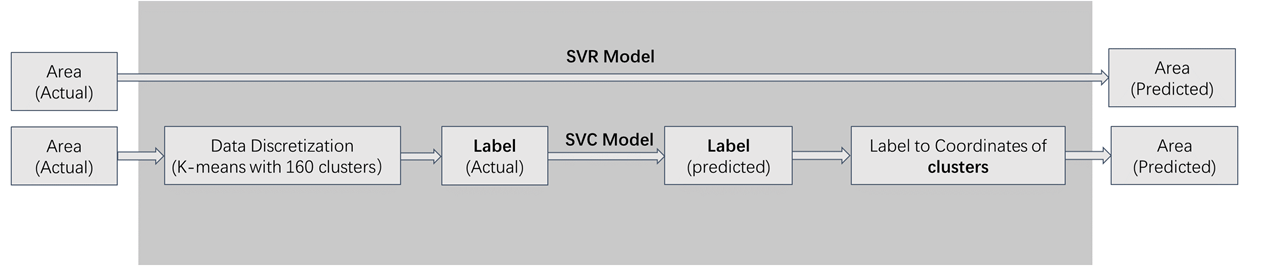

## Experiments and Results
In this section, the techniques of feature engineering will be introduced at first. Then, the model will be fitted with the data processed by these methods. Next, MAD and RMSE indexes of all models were compared by plotting. Last but not least, the predicted results of the baseline model and the best model will be shown by the data visualization in 3D-figures.

### Logarithmic Function to the Attribures,Area. 
This function can change the distrubution of used attributes. In this study, the logarithmic function was used to the explained attribute to make it near the normal distribution. 

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns  
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
def log_10(data):
    ln_area = pd.DataFrame()
    ln_area = data.apply(lambda x: np.log10(x+1))
    return ln_area
def invert_log10(data):
    return np.power(10,data)-1

Text(0.5, 1.0, 'The distribution of log10(area+1)')

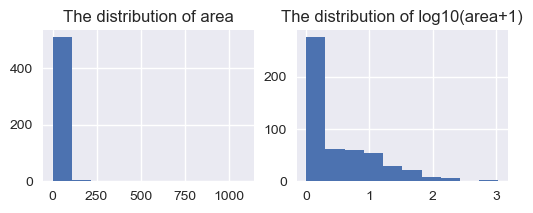

In [6]:
# The distrubution of original area and log10(area)
plt.figure(dpi=100,figsize=(6,2))
plt.subplot(1,2,1)
data.area.hist()
plt.title("The distribution of area")
plt.subplot(1,2,2)
log_10(data.area).hist()
plt.title("The distribution of log10(area+1)")

### One-hot Encoding
One-Hot Encoding uses N-bit status registers to encode N states. Each state has its own independent register bit, and at any time, only one bit is valid. In this study, the quality attribute
was converted by one-hot encoding to a vector shaping in the N-dimensions which was equal to
the number of categories. More specifically, there are six categories {2,3,5,6,7,8} in the dataset,
these categories shown an unbalanced in one dimensional space due to the different Euclidean
distance between each two categories. After the converting, this attribute was converted in a vector with 6-dimensions. For example, the categories of 3 was presented by the vector {0,1,0,0,0,0}
and the 8 was {0,0,0,0,0,1}.
This is the example of One-Hot Encoding:
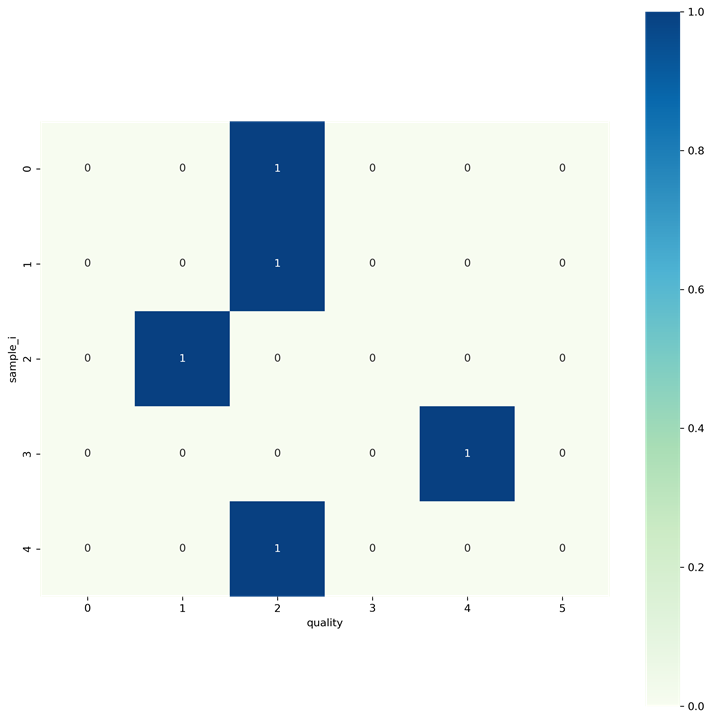

In [7]:
def ontHotEncoding(y):
    from sklearn.preprocessing import OneHotEncoder
    y = np.array(y).reshape(-1,1)
    enc = OneHotEncoder()
    enc.fit(y)
    y = enc.transform(y).toarray()
    return y,enc

### Polynomia Features
Polynomial Features are those which are created through raising to an exponent. For example,
the input attribute X processed by PF can be a new feature such as $X^{2}$
, $X^{3}$
. The processing can
be repeated on all attributes. And PF can generate features through combining. For example,
there are two features $X$ and $Y$ , the new features $XY$ can be created through multiplication of
two original features. The exponent of features created should equal or less than the degree.
The number of new features can be increased exponentially, the figure 5.1 shows the number of
features created by PF in various and rising degrees.

In [8]:
def polynomialFeatures(x,degree):
    from sklearn.preprocessing import PolynomialFeatures
    po = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    data = po.fit_transform(x)
    return data,po

### StandardScaler
The standard score of a sample x is calculated as:
$$
Z=\frac{X-U}{S}
$$
where u is the mean of the samples or zero if with_mean=False, and s is the standard deviation of the samples or one if with_std=False.

In [9]:
def standard(x):
    from sklearn.preprocessing import StandardScaler
    st = StandardScaler()
    data = st.fit_transform(x)
    return data,st

### PCA
PCA can solve the problem coming with linear correlation. PCA converts the data from Ndimensions to a lower K-dimensions through the eigenvector matrix shaped in R×C, R was the
number of features in original dataset and C was equaled with K set by users.

In [10]:
def principalComponentAnalysis(x,n_components=5):
    from sklearn.decomposition import PCA
    pc = PCA(n_components=n_components)
    data = pc.fit_transform(x)
    return data,pc

### Recursive Features Elimination
We used the RFE to find the best-set and test their performance on the prediction model.
The features selecting strategy was eliminate the less important features one by one. This
method can find the best-subsets of dataset while it also spends much long time on fitting the
model.


In [11]:
def recursiveFeatureElimination(X,y,model):
    from sklearn.feature_selection import RFE
    from sklearn.feature_selection import RFECV
    selector = RFECV(model, step=1,cv=5)
    selector = selector.fit(X, y)
    selector.support_
    selector.ranking_
    return selector.transform(X),selector

### Manual Features: Holiday and Weekend
By viewing the data of the total burned area in months, there are two months, august and september has the extream high figures. And these two months are summer vacation in Portugal. This means the fires may be coursed by human, thus  Weekend and Summer Holiday were built as new features.

In [12]:
def Holiday(data):
    data['holiday'] = data['month'].apply(lambda x: 1 if (x == 8 or x == 9) else 0)
def Weekend(data):
    data['weekend'] = data['day'].apply(lambda x: 1 if (x == 6 or x == 7) else 0)

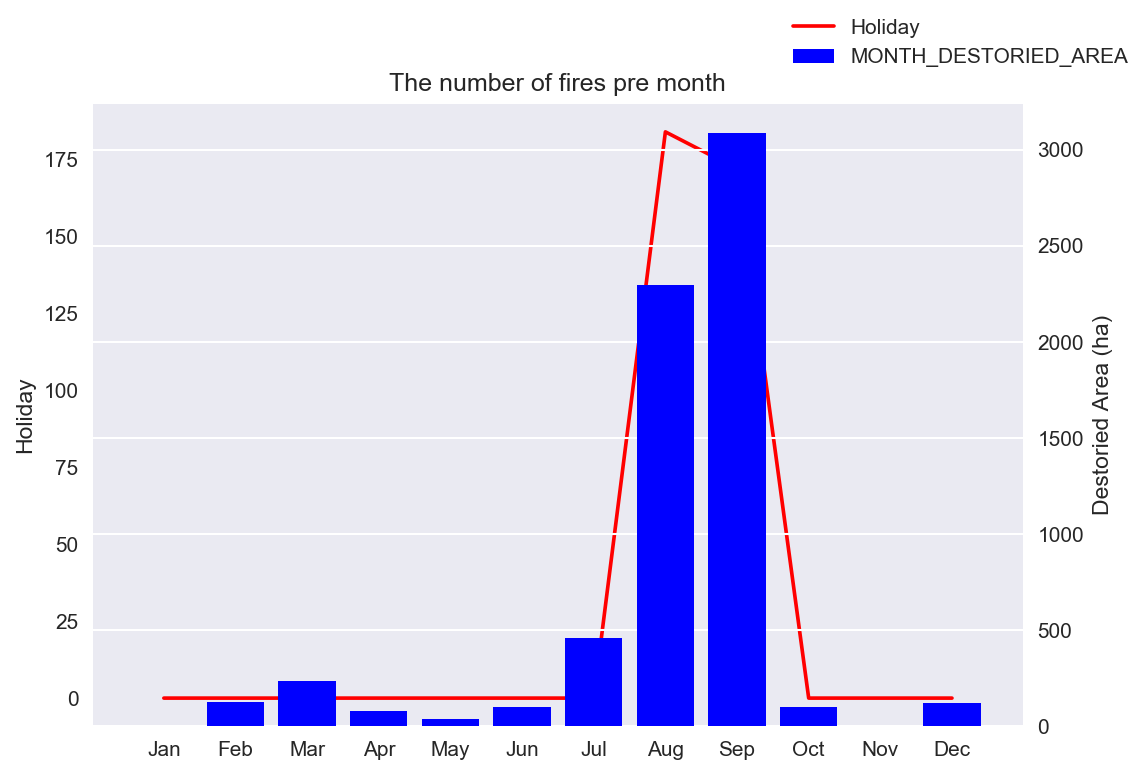

In [63]:
TotalAreaInMonth = []
for i in range(12):
    AreaMonth = data.area.loc[(data.area != 0)&(data.month == i+1)]
    TotalAreaInMonth.append(AreaMonth.sum())
holiday_month = []
for i in range(12):
    ho = data.holiday.loc[(data.month == i+1)].sum()
    holiday_month.append(ho)
    
fig = plt.figure(dpi=150)
plt.title("The number of fires pre month")

ax = fig.add_subplot(111)
ax.plot(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],holiday_month,'-', label = 'Holiday',color='red')
ax.grid()
ax.set_ylabel(r"Holiday")


ax2 = ax.twinx()
ax2.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],TotalAreaInMonth,  label = 'MONTH_DESTORIED_AREA',color='blue')
ax2.set_ylabel(r"Destoried Area (ha)")
ax2.set_xlabel("Month")


fig.legend(loc=1)

### Data Discretization (Kmeans to Area)
*Data discretization* refers to grouping continuous data into a discretized interval. In this experiment, we used kmanes algorithm to implement an unsupervised data discretization method. The changed data is farther in space, compared to continuous data, and the distribution is more uniform.

In [13]:
def K_means(x,n):
    from sklearn.cluster import KMeans
    x = np.array(x).reshape(-1,1)
    kmeans_model = KMeans(n_clusters=n, random_state=0).fit(x)
    return kmeans_model.predict(x),kmeans_model

def invert_K_means(label,kmodel):
    centers = kmodel.cluster_centers_
    data_inver = label.copy()
    for idx,val in enumerate(label):
        data_inver[idx] = centers[val]
    return data_inver

The Goodness of Variance Fit(GVF) was used to evluate the result of data discretization. 
SDAM is the Sum of squared Deviations from the Array Mean. SDCM is the Sum of squared Deviations about Class Mean.\
Obviously, SDAM is a constant, while SDCM is related to the classification number $K$.
By this way, we can find a $K$ to achieve the aim of **High cohesion, low coupling**.

$S D C M=\sum_{j=1}^{k} \frac{1}{N_{i}} \sum_{i=1}^{N_{i}}\left(z_{i j}-\bar{z}_{j}\right)^{2}$

$S D A M=\frac{1}{\mathrm{~N}} \sum_{i=1}^{N}\left(z_{i}-\bar{z}\right)^{2}$

$G V F=1-\frac{S D M C}{S D A M}$

In [14]:
def GVF(data,label,n):
    SDCM_C = []
    for i in range(n):
        idx = np.argwhere(label==i)
        temp = []
        for j in idx:
            temp.append(data[j])
        temp = np.array(temp)
        SDCM_C.append(np.var(temp))
    SDCM = np.array(SDCM_C).mean()

    SDAM = np.var(data)
    GVF = 1. - (SDCM/SDAM)
    return GVF

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:01<00:00, 10.06it/s]


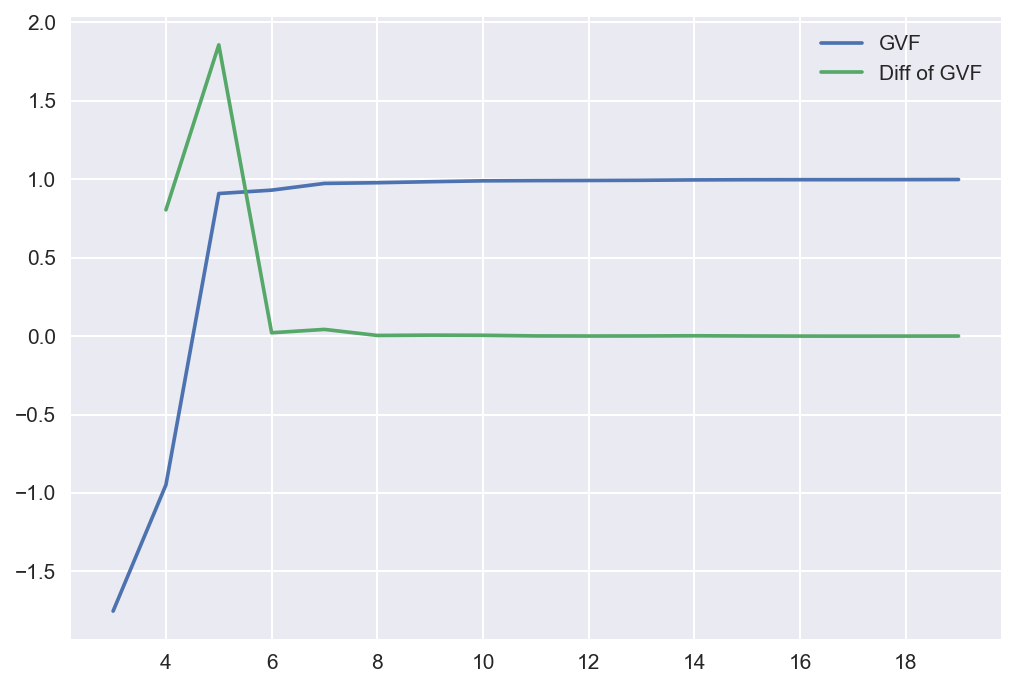

In [15]:
def plot_GVF(data,n_start=3,n_end=20):
    from tqdm import tqdm
    score = []
    for i in tqdm(range(n_start,n_end)):
        data_kmeans,_ = K_means(data,i)
        score.append(GVF(data,data_kmeans,i))
    plt.figure(dpi=150)
    plt.plot(range(n_start,n_end),score,label='GVF')
    plt.plot(range(n_start+1,n_end),np.diff(score),label="Diff of GVF")
    plt.legend()
plot_GVF(np.array(data.area))

### Metric Methods

In [16]:
def MAD(y,y_pred):
    assert y.shape == y_pred.shape , ("Shapes of Y and Ypred are not different!","Got shape:",y.shape,y_pred.shape)
    return (abs(y-y_pred)).mean()
def RMSE(y,y_pred):
    import math 
    assert y.shape == y_pred.shape , ("Shapes of Y and Ypred are not different!","Got shape:",y.shape,y_pred.shape)
    return (math.sqrt((abs(y-y_pred)).mean()))

In [17]:
def Fitting_predicting_On_SVR(X_train,X_test,y_train,y_test):
    from sklearn.svm import SVR
    svr_model = SVR(kernel='linear')
    svr_model.fit(X_train,y_train)
    y_train_predict = svr_model.predict(X_train)
    y_test_predict = svr_model.predict(X_test)
    return y_train_predict,y_test_predict

def Fitting_predicting_On_SVC(X_train,X_test,y_train,y_test):
    from sklearn.svm import SVC
    svc_model = SVC()
    svc_model.fit(X_train,y_train)
    y_train_predict = svc_model.predict(X_train)
    y_test_predict = svc_model.predict(X_test)
    return y_train_predict,y_test_predict
    
def MAD_RMSE(y_train,y_test,y_train_predict,y_test_predict):
    print("MAD of the train set:",MAD(y_train,y_train_predict))
    print("RMSE of the train set",RMSE(y_train,y_train_predict))
    print("MAD of the test set:",MAD(y_test,y_test_predict))
    print("RMSE of the test set",RMSE(y_test,y_test_predict))
    return MAD(y_train,y_train_predict),RMSE(y_train,y_train_predict),MAD(y_test,y_test_predict),RMSE(y_test,y_test_predict)

In [18]:
score_global = []

# Experiments and Results

## Modeling
15 strategies were used to generate data and models were trained with default parameters.

**SVC model**:
* Regularization parameter (squared l2 penalty) *C*:1.0
* Kernel:linear
* Tolfloat:1e-3

**SVR model**:
* Regularization parameter (squared l2 penalty) *C*:1.0
* Kernel:linear
* Epsilon:0.1
* Tolfloat:1e-3

### Baseline Model
Four weather conditions data were used as iuput data

In [19]:
from sklearn.model_selection import train_test_split

y = data.area
X = data[['temp','RH','wind','rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append(MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict))

MAD of the train set: 10.498244962604256
RMSE of the train set 3.240099529737359
MAD of the test set: 18.21021814305973
RMSE of the test set 4.2673432183338305


### Baseline Model + dataStander

In [20]:
y = data.area
X = data[['temp','RH','wind','rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_st,st = standard(X_train)
X_test_st = st.transform(X_test)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append(MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict))

MAD of the train set: 10.498244962604256
RMSE of the train set 3.240099529737359
MAD of the test set: 18.21021814305973
RMSE of the test set 4.2673432183338305


### REF

In [21]:
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.svm import SVR 
svr_model = SVR(kernel='linear')
X_train_RFE, rfe = recursiveFeatureElimination(X_train,y_train,svr_model)
X_test_REF = rfe.transform(X_test)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append((MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict)))

MAD of the train set: 10.408593739289973
RMSE of the train set 3.2262352268999193
MAD of the test set: 18.259361307829057
RMSE of the test set 4.273097390398335


The *support* attributes of RFE means that the features are accepted and have contribution to prediction when the support index equal one.In this model, all attributes are accpeted.

In [22]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

### Imblearn random over sampler

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
data['isFired'] = data['area'].apply(lambda x: 1 if x > 0 else 0)

y = data.isFired
X = data.drop(['isFired'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train, y_train = ros.fit_resample(X_train, y_train)

y_train = X_train['area']
X_train = X_train.drop(['area'],axis=1)

y_test = X_test['area']
X_test = X_test.drop(['area'],axis=1)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append(MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict))

data = data.drop(['isFired'],axis=1)

MAD of the train set: 10.277987982876324
RMSE of the train set 3.2059301275723904
MAD of the test set: 18.261368328508237
RMSE of the test set 4.273332227724429


### One-hot Encoding to X and Y

In [24]:
OH_X,_ = ontHotEncoding(data[['X']])
OH_Y,_ = ontHotEncoding(data[['Y']])
data_withoutXY = np.array(data.drop(['X','Y','area'],axis = 1))
y = data.area
data_withXY = np.concatenate([OH_X,OH_Y,data_withoutXY],axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_withXY, y, test_size=0.3, random_state=0)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append((MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict)))

MAD of the train set: 10.313761712653466
RMSE of the train set 3.2115045870516
MAD of the test set: 18.188577600464207
RMSE of the test set 4.264806865552555


### One-hot Encoding to Month and Day

In [25]:
OH_month,_ = ontHotEncoding(data[['month']])
OH_day,_ = ontHotEncoding(data[['day']])
data_withoutMonthDay = np.array(data.drop(['month','day','area'],axis = 1))
y = data.area
data_withMonthDay = np.concatenate([OH_month,OH_day,data_withoutMonthDay],axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_withMonthDay, y, test_size=0.3, random_state=0)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append(MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict))

MAD of the train set: 10.279940140237803
RMSE of the train set 3.2062345734892514
MAD of the test set: 18.319080481106738
RMSE of the test set 4.280079494718146


### Log10() to area

In [26]:
X = data.drop('area',axis=1)
y_log10 = log_10(data.area)

X_train, X_test, y_train, y_test = train_test_split(X, y_log10, test_size=0.3, random_state=0)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append((MAD_RMSE(invert_log10(y_train), invert_log10(y_test),invert_log10(y_train_predict),invert_log10(y_test_predict))))

MAD of the train set: 10.342012953314116
RMSE of the train set 3.215900022282116
MAD of the test set: 18.161243901078972
RMSE of the test set 4.261601095959002


### New Features:Holiday and Weekend

In [27]:
Weekend(data)
Holiday(data)

X = data.drop('area',axis=1)
y = data.area

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append((MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict)))

data = data.drop('holiday',axis=1)
data = data.drop('weekend',axis=1)

MAD of the train set: 10.405990384537981
RMSE of the train set 3.2258317353107526
MAD of the test set: 18.291190900079364
RMSE of the test set 4.276820185614467


### Holiday and Weekend + REF

In [28]:
Weekend(data)
Holiday(data)

X = data.drop('area',axis=1)
y = data.area

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svr_model = SVR(kernel='linear')
X_train_RFE, rfe = recursiveFeatureElimination(X_train,y_train,svr_model)
X_test_REF = rfe.transform(X_test)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train_RFE, X_test_REF, y_train, y_test)
score_global.append(MAD_RMSE(y_train,y_test,y_train_predict,y_test_predict))

data = data.drop('holiday',axis=1)
data = data.drop('weekend',axis=1)

MAD of the train set: 10.405990384537981
RMSE of the train set 3.2258317353107526
MAD of the test set: 18.291190900079364
RMSE of the test set 4.276820185614467


The new features of Holiday and Weekend also accepted by the esimator and these two mannual features has contributed to prediction.

In [29]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### PCA(4)

In [30]:
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_pca,pca = principalComponentAnalysis(X_train,4)
X_test_pca = pca.transform(X_test)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train_pca, X_test_pca, y_train, y_test)
score_global.append(MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict))

MAD of the train set: 10.51597359083553
RMSE of the train set 3.2428341910797
MAD of the test set: 18.16102064432379
RMSE of the test set 4.261574901878857


### PCA(7)

In [31]:
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_pca,pca = principalComponentAnalysis(X_train,7)
X_test_pca = pca.transform(X_test)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train_pca, X_test_pca, y_train, y_test)
score_global.append(MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict))

MAD of the train set: 10.503408167980924
RMSE of the train set 3.240896198273083
MAD of the test set: 18.17429511458301
RMSE of the test set 4.26313207801295


### Kmeans to FFMC

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

FFMC_train,kmodel = K_means(X_train.FFMC,7)
FFMC_test = kmodel.predict(np.array(X_test.FFMC).reshape(-1,1))

X_train["FFMC_kmeans"] = FFMC_train
X_test["FFMC_kmeans"] = FFMC_test
X_train = X_train.drop('FFMC',axis=1)
X_test = X_test.drop('FFMC',axis=1)

y_train_predict,y_test_predict = Fitting_predicting_On_SVR(X_train, X_test, y_train, y_test)
score_global.append(MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict))

MAD of the train set: 10.417516415562055
RMSE of the train set 3.2276177616877213
MAD of the test set: 18.292065148566696
RMSE of the test set 4.276922392160827


### Kmeans to Area

In [33]:
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train_kmeans,kmodel = K_means(y_train,160)
y_test_kmeans = kmodel.predict(np.array(y_test).reshape(-1,1))

y_train_predict,y_test_predict = Fitting_predicting_On_SVC(X_train, X_test, y_train_kmeans, y_test_kmeans)
# before invest
# MAD_RMSE(y_train_kmeans, y_test_kmeans,y_train_predict,y_test_predict)
#invert
# print("__________After invert_____________")
score_global.append(MAD_RMSE(invert_K_means(y_train_kmeans,kmodel),
         invert_K_means(y_test_kmeans,kmodel),
         invert_K_means(y_train_predict,kmodel),
         invert_K_means(y_test_predict,kmodel)))

MAD of the train set: 10.285318559556787
RMSE of the train set 3.2070732077015
MAD of the test set: 15.83974358974359
RMSE of the test set 3.9799175355456287


### Kmenas to Area + imblearn.RandomOverSampler

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#kmeans
y_train_kmeans,kmodel = K_means(y_train,160)
y_test_kmeans = kmodel.predict(np.array(y_test).reshape(-1,1))
#oversampling to training set
# X_train_ros, y_train_kmeans_ros = ros.fit_resample(X_train, y_train_kmeans)
X_train_ros, y_train_kmeans_ros = ros.fit_resample(X_train, y_train_kmeans)
#training
y_train_predict,y_test_predict = Fitting_predicting_On_SVC(X_train_ros, X_test, y_train_kmeans_ros, y_test_kmeans)
#inverse_kmeans_predict
y_train_predict_invert = invert_K_means(y_train_predict,kmodel)
y_test_predict_invert = invert_K_means(y_test_predict,kmodel)
#inverse_kmeans_original
y_train_kmeans_ros_invert = invert_K_means(y_train_kmeans_ros,kmodel)
y_test_kmeans_invert = invert_K_means(y_test_kmeans,kmodel)

score_global.append(MAD_RMSE(y_train_kmeans_ros_invert, y_test_kmeans_invert,y_train_predict_invert,y_test_predict_invert))

MAD of the train set: 3.1053721910112357
RMSE of the train set 1.7622066255156448
MAD of the test set: 34.705128205128204
RMSE of the test set 5.8911058558752964


### Kmenas to Area + imblearn.RandomUnderSampler

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#kmeans
y_train_kmeans,kmodel = K_means(y_train,160)
y_test_kmeans = kmodel.predict(np.array(y_test).reshape(-1,1))
#oversampling to training set
# X_train_rus, y_train_kmeans_ros = ros.fit_resample(X_train, y_train_kmeans)
X_train_rus, y_train_kmeans_ros = rus.fit_resample(X_train, y_train_kmeans)
#training
y_train_predict,y_test_predict = Fitting_predicting_On_SVC(X_train_rus, X_test, y_train_kmeans_ros, y_test_kmeans)
#inverse_kmeans_predict
y_train_predict_invert = invert_K_means(y_train_predict,kmodel)
y_test_predict_invert = invert_K_means(y_test_predict,kmodel)
#inverse_kmeans_original
y_train_kmeans_ros_invert = invert_K_means(y_train_kmeans_ros,kmodel)
y_test_kmeans_invert = invert_K_means(y_test_kmeans,kmodel)

score_global.append((MAD_RMSE(y_train_kmeans_ros_invert, y_test_kmeans_invert,y_train_predict_invert,y_test_predict_invert)))

MAD of the train set: 0.125
RMSE of the train set 0.3535533905932738
MAD of the test set: 33.81410256410256
RMSE of the test set 5.814989472398257


## Results
All MAD and RMSE were plotted in this figure to comparea and find the best model.

In [36]:
score_global = np.array(score_global)
model_name = ['4_Weather_Features','4_Weather_Features+dataStander',
             'RFE','Imblearn Random Over Sampler',
             'One-hot Encoding to X and Y','One-hot encoding to Month and Day',
             'Log10 to area','Holiday and Weekend',
             'Holiday and Weekend + REF','PCA(4)',
             'PCA(7)','Kmeans(160) to FFMC',
             'Kmeans(160) to Area','Kmenas(160) to Area + imblearn.RandomOverSampler',
             'Kmenas(160) to Area + imblearn.RandomUnderSampler']

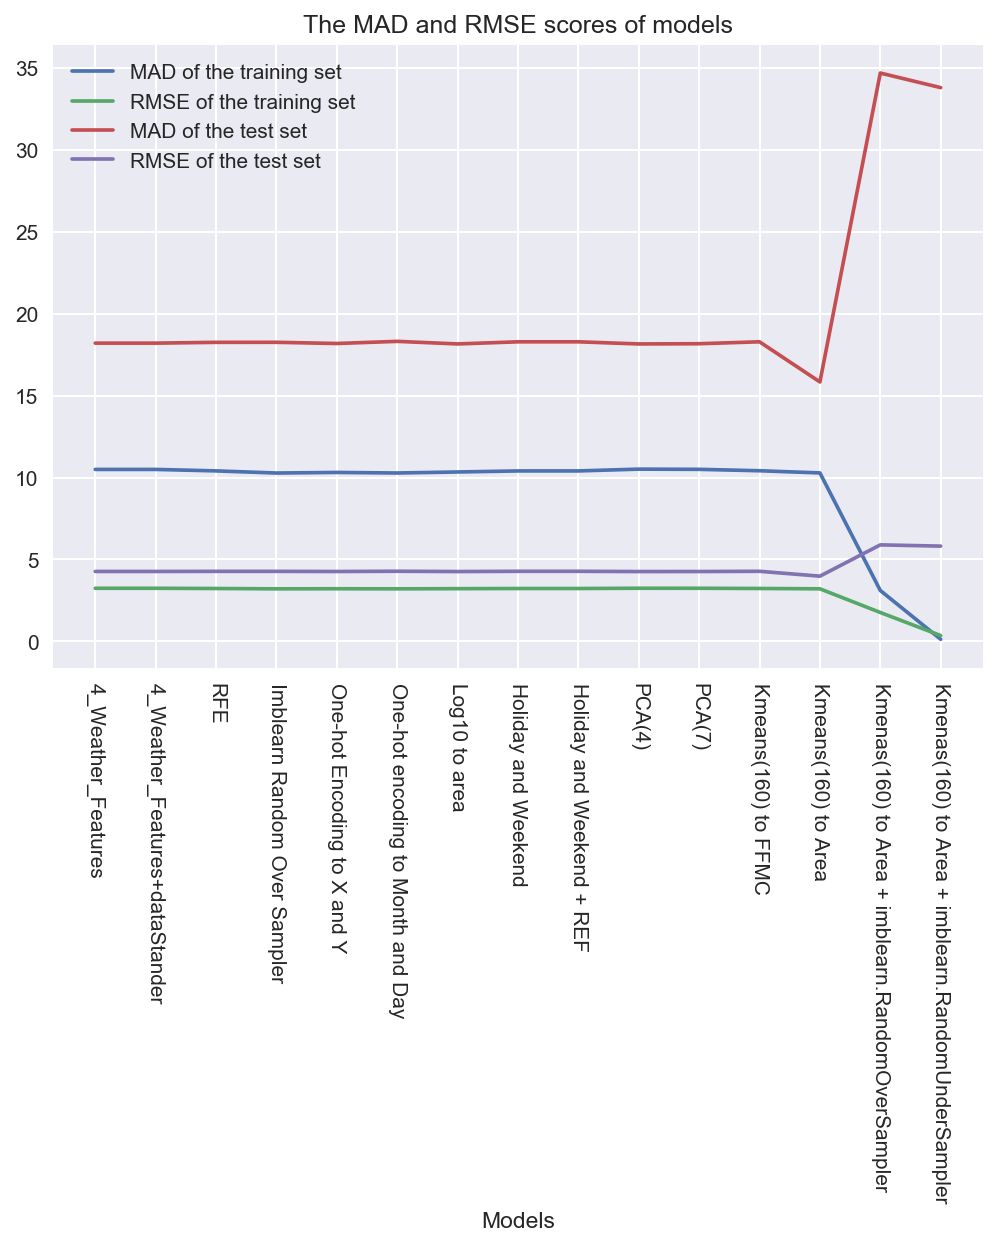

In [37]:
score_global = pd.DataFrame(score_global,columns=['MADofTrain','RMSEofTrain','MADofTest','RMSEofTest'])
plt.figure(dpi=150)
plt.plot(model_name,score_global['MADofTrain'],label='MAD of the training set')
plt.plot(model_name,score_global['RMSEofTrain'],label='RMSE of the training set')
plt.plot(model_name,score_global['MADofTest'],label='MAD of the test set')
plt.plot(model_name,score_global['RMSEofTest'],label='RMSE of the test set')
plt.xticks(rotation = -90)
plt.xlabel("Models")
plt.title('The MAD and RMSE scores of models')
plt.legend()

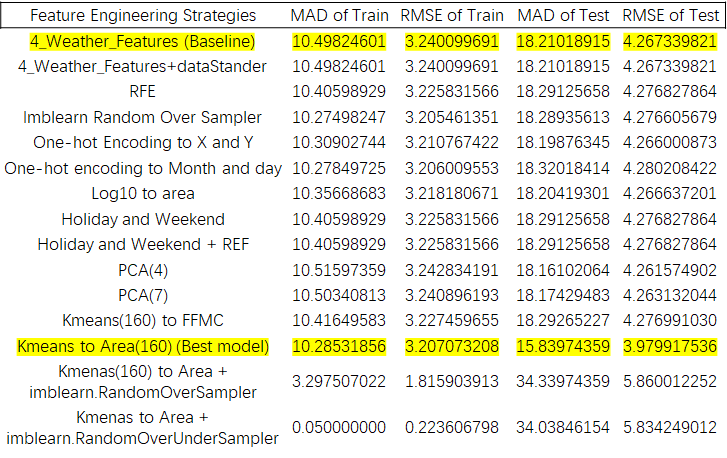
<center> The score of models

## Results Visuliazation
The figure show that the count of burned area of the predicted dataset.

In [38]:
def visulation(X,y,title):
    area = np.array(y).reshape(-1,1)
    areaInGrid = np.zeros([10,10])
    for i in range(len(X)):
        x = data.X[i]
        y = data.Y[i]
        areaInGrid[x][y] += area[i]
    print(areaInGrid.shape)
    areaInGrid_inv = np.zeros([10,10])
    for i in range(10):
        areaInGrid_inv[9-i,:] = areaInGrid[i,:]

    fig = plt.figure(dpi=150)
    ax = Axes3D(fig)
    X = np.arange(0, 10, 1)
    Y = np.arange(0, 10, 1)
    X, Y = np.meshgrid(X, Y)
    Z = areaInGrid

    cset = ax.contour(X, Y, Z, zdir='z', offset=-1300, cmap=cm.coolwarm)

    ax.set_xlabel('X')
    ax.set_xlim(0, 10)
    ax.set_ylabel('Y')
    ax.set_ylim(0, 10)
    ax.set_zlabel('Z')
    ax.set_zlim(-1000, 1200)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
    plt.title(title)
    plt.show()
    
# visulation(X_train,invert_K_means(y_train_kmeans,kmodel),"The count of destoyed area of the training set - prediction results")
# visulation(X_train,y_train,"The count of destoyed area of the training set - label")
# visulation(X_test,invert_K_means(y_test_kmeans,kmodel),"The count of destoyed area of the testing set - prediction results")
# visulation(X_test,y_test,"The count of destoyed area of the testing set - label")

### Baseline Model

In [39]:
def Fitting_predicting_On_SVR_with_weight(X_train,X_test,y_train,y_test):
    from sklearn.svm import SVR
    svr_model = SVR(kernel='linear')
    svr_model.fit(X_train,y_train)
    y_train_predict = svr_model.predict(X_train)
    y_test_predict = svr_model.predict(X_test)
    return y_train_predict,y_test_predict,svr_model

In [40]:
y = data.area
X = data[['temp','RH','wind','rain']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train_predict,y_test_predict,model_4_Features = Fitting_predicting_On_SVR_with_weight(X_train, X_test, y_train, y_test)
MAD_RMSE(y_train, y_test,y_train_predict,y_test_predict)

MAD of the train set: 10.498244962604256
RMSE of the train set 3.240099529737359
MAD of the test set: 18.21021814305973
RMSE of the test set 4.2673432183338305


(10.498244962604256, 3.240099529737359, 18.21021814305973, 4.2673432183338305)

(10, 10)


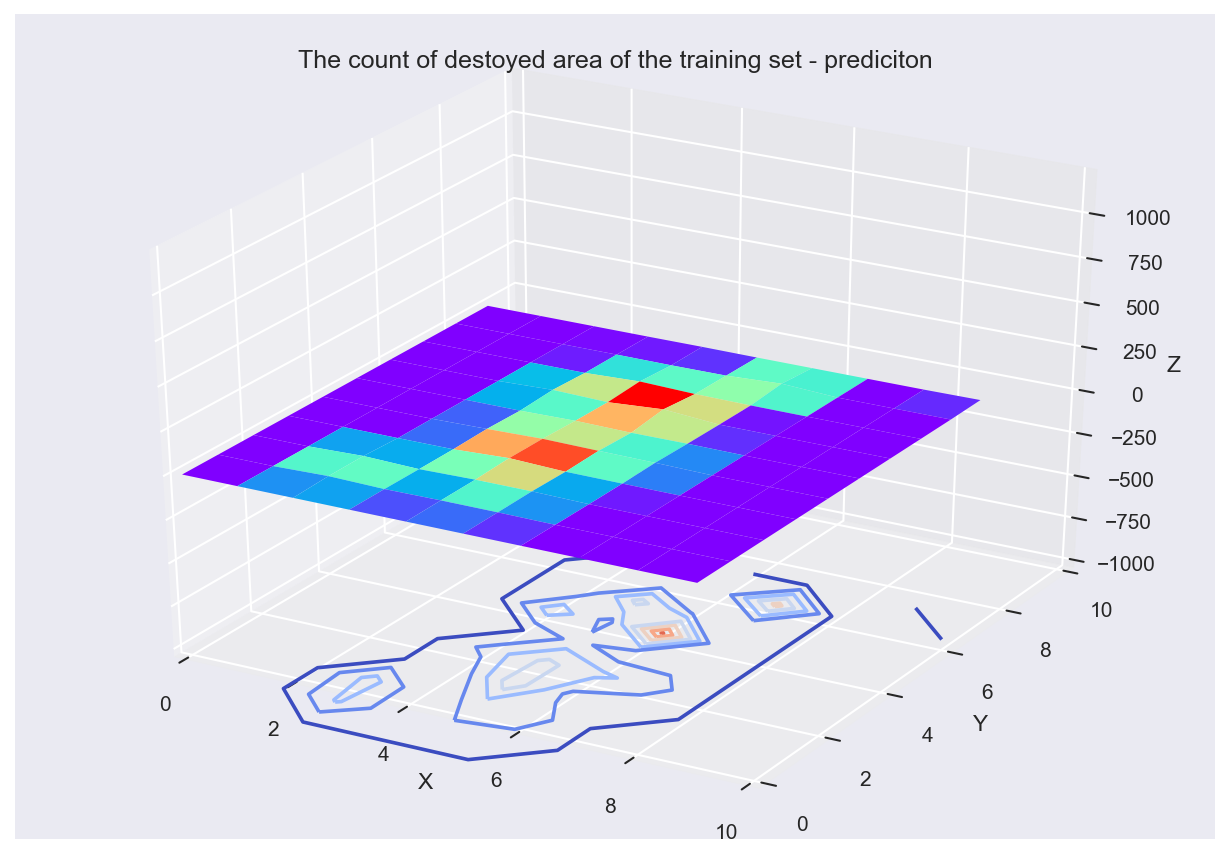

In [41]:
visulation(X_train,y_train_predict,"The count of destoyed area of the training set - prediciton")

(10, 10)


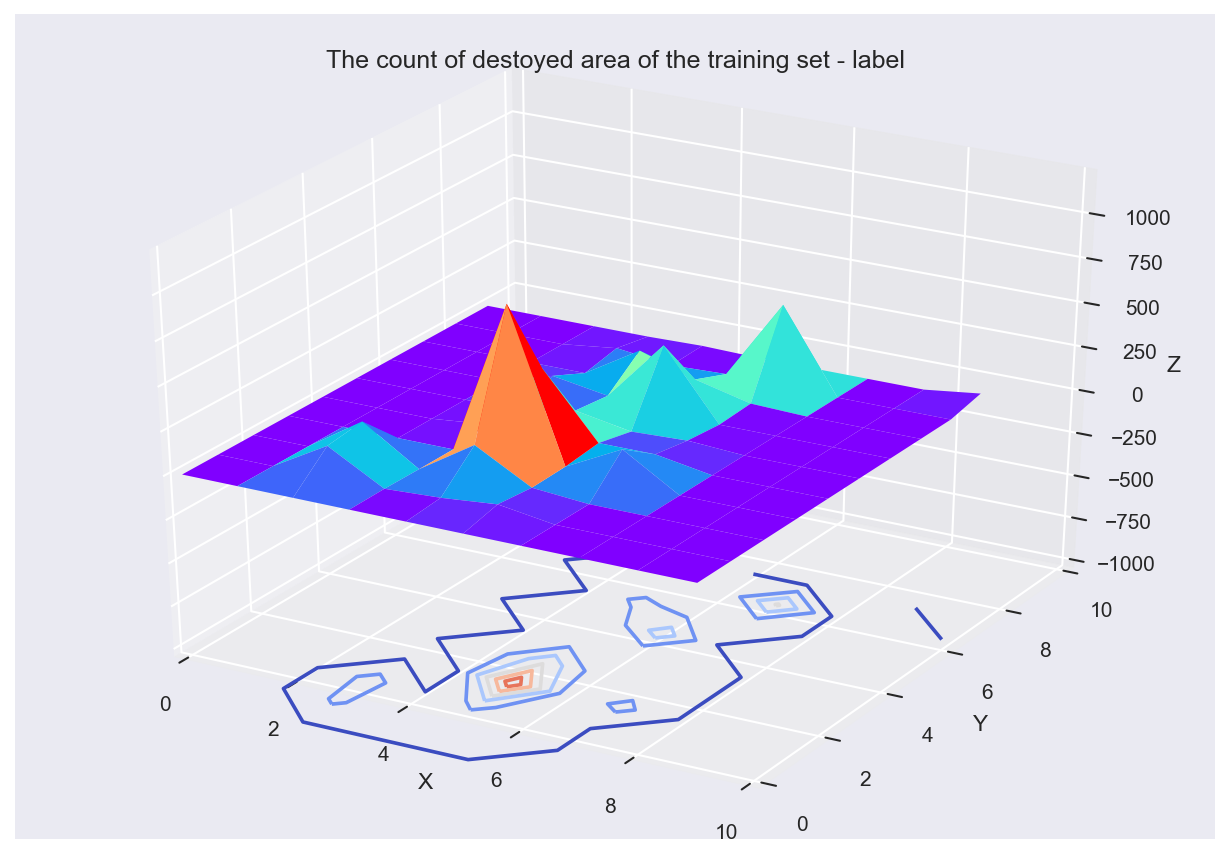

In [42]:
visulation(X_train,y_train,"The count of destoyed area of the training set - label")

(10, 10)


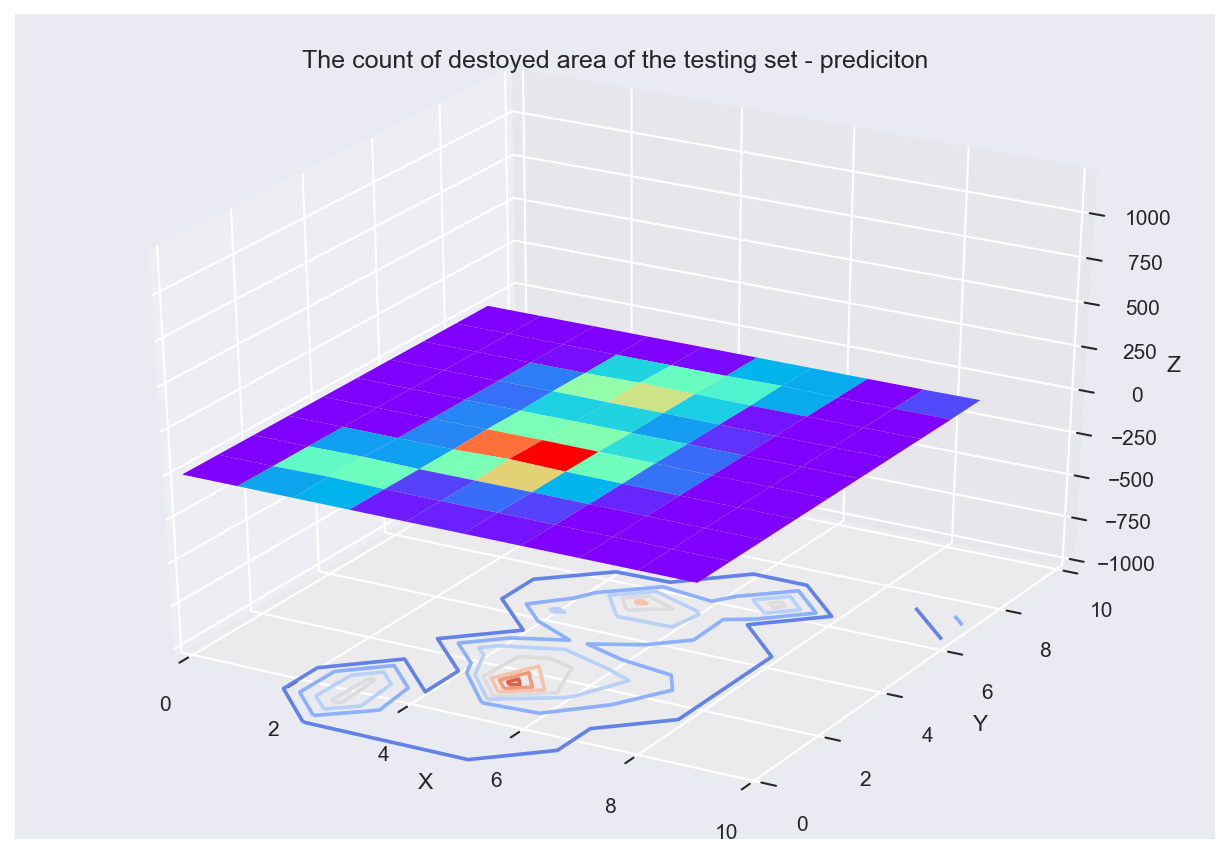

In [43]:
visulation(X_test,y_test_predict,"The count of destoyed area of the testing set - prediciton")

(10, 10)


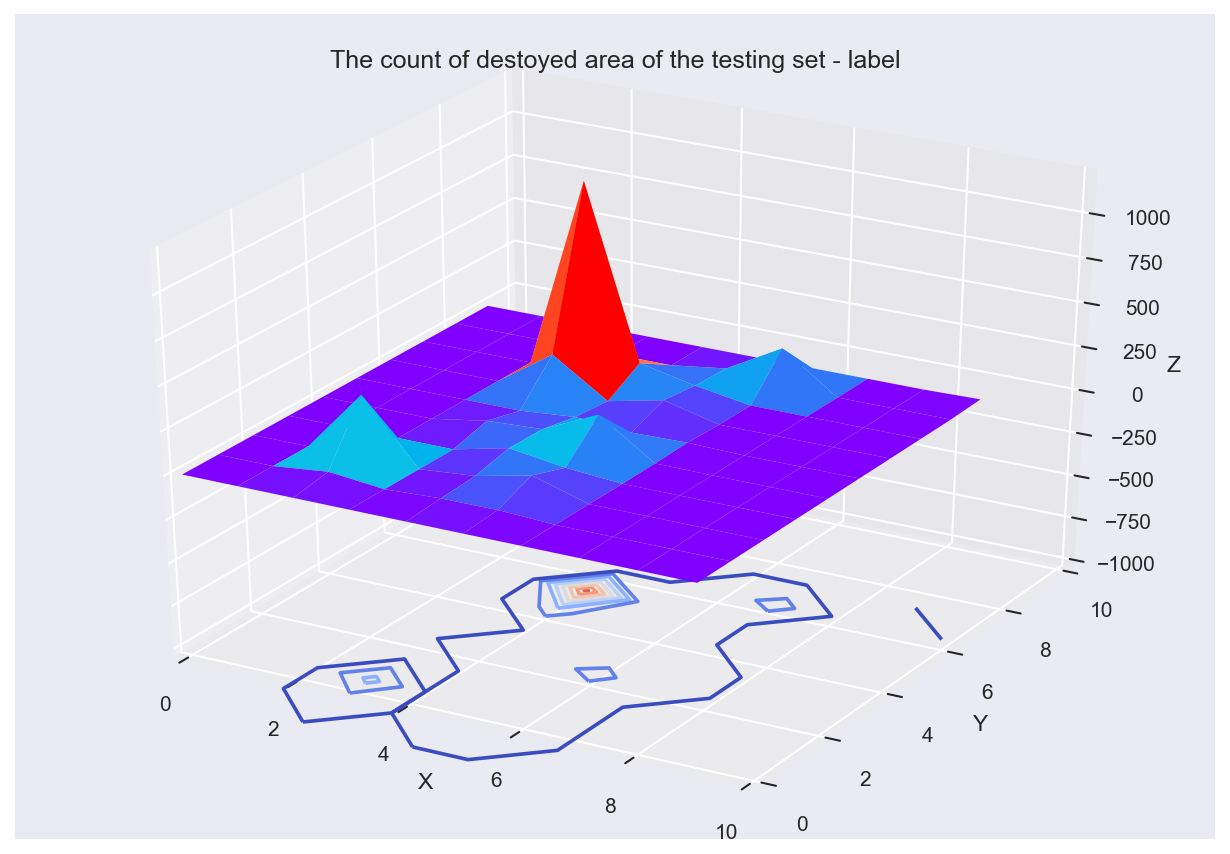

In [44]:
visulation(X_test,y_test,"The count of destoyed area of the testing set - label")

### Best Model

In [45]:
def Fitting_predicting_On_SVC_with_weight(X_train,X_test,y_train,y_test):
    from sklearn.svm import SVC
    svc_model = SVC()
    svc_model.fit(X_train,y_train)
    y_train_predict = svc_model.predict(X_train)
    y_test_predict = svc_model.predict(X_test)
    return y_train_predict,y_test_predict,svc_model

In [46]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('forestfires.csv')
data.replace({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7},inplace=True)
data.replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,
              'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
Weekend(data)
Holiday(data)
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train_kmeans,kmodel = K_means(y_train,160)
y_test_kmeans = kmodel.predict(np.array(y_test).reshape(-1,1))

y_train_predict,y_test_predict,model_Kmean_160 = Fitting_predicting_On_SVC_with_weight(X_train, X_test, y_train_kmeans, y_test_kmeans)

MAD_RMSE(invert_K_means(y_train_kmeans,kmodel),
         invert_K_means(y_test_kmeans,kmodel),
         invert_K_means(y_train_predict,kmodel),
         invert_K_means(y_test_predict,kmodel))

MAD of the train set: 10.285318559556787
RMSE of the train set 3.2070732077015
MAD of the test set: 15.83974358974359
RMSE of the test set 3.9799175355456287


(10.285318559556787, 3.2070732077015, 15.83974358974359, 3.9799175355456287)

(10, 10)


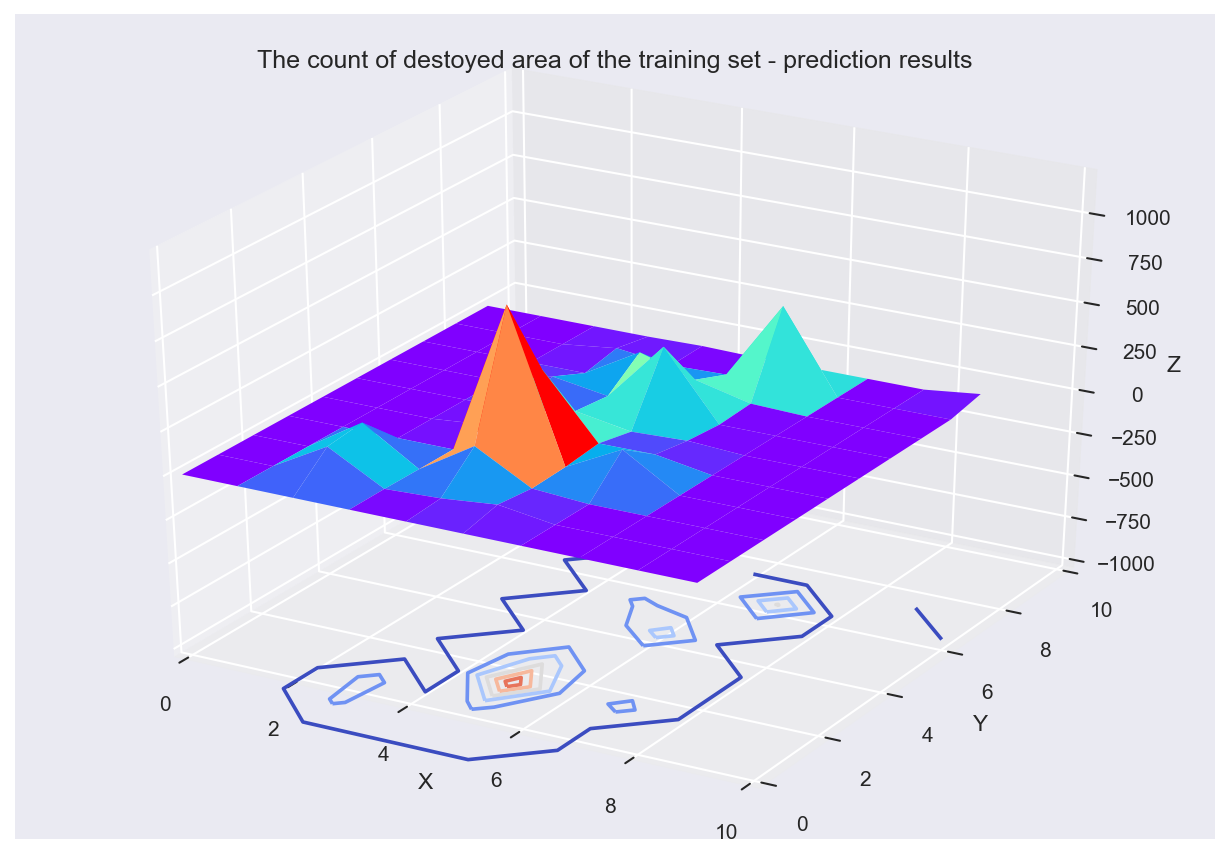

In [47]:
visulation(X_train,invert_K_means(y_train_kmeans,kmodel),"The count of destoyed area of the training set - prediction results")

(10, 10)


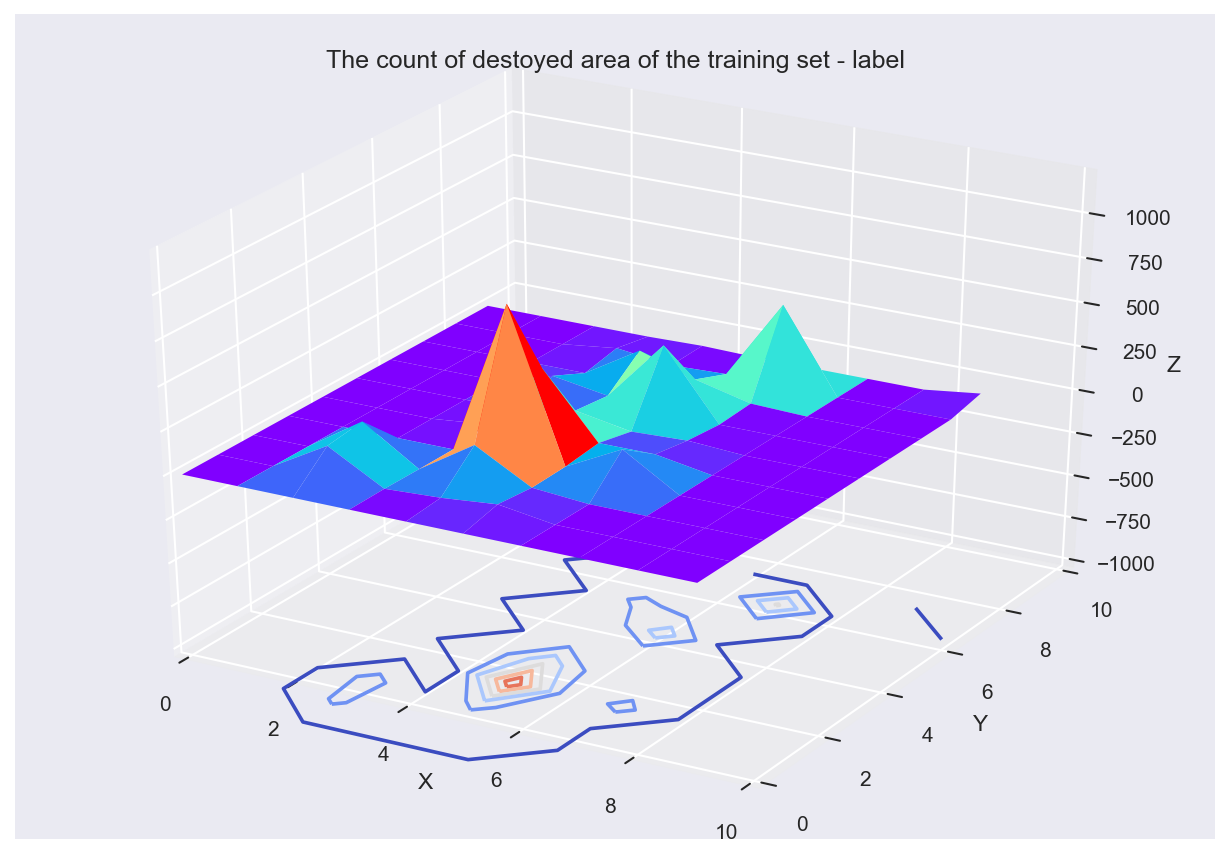

In [48]:
visulation(X_train,y_train,"The count of destoyed area of the training set - label")

### Zeros-model

In [49]:
zeros_prediction_train = np.zeros(y_train.shape)
zeros_prediction_test = np.zeros(y_test.shape)
MAD_RMSE(y_train, y_test,zeros_prediction_train,zeros_prediction_test)

MAD of the train set: 10.529335180055401
RMSE of the train set 3.2448937085913
MAD of the test set: 18.21128205128205
RMSE of the test set 4.267467873491499


(10.529335180055401, 3.2448937085913, 18.21128205128205, 4.267467873491499)

(10, 10)


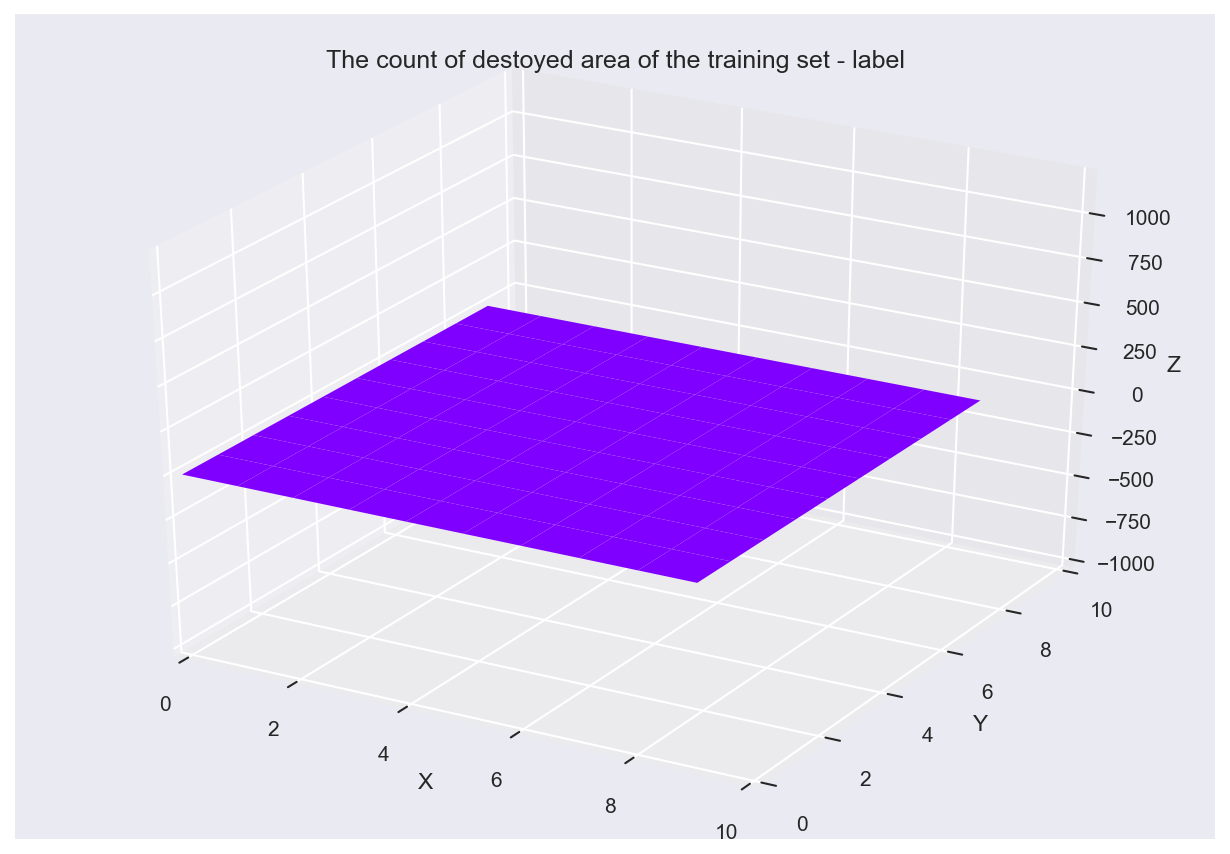

In [50]:
visulation(X_train,zeros_prediction_train,"The count of destoyed area of the training set - label")

## GridSearch of hyperparameter of the best model
The *GrieSearch* was used to find the best parameters of the model. In this experiment, *the best model*  has only one parameter *C* (squared l2 penalty). There are 15 figures of C starting from 0 to 1. And the best *C* is 0.

In [51]:
# Prepare Data
data = pd.read_csv('forestfires.csv')
data.replace({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7},inplace=True)
data.replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,
              'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
Weekend(data)
Holiday(data)
y = data.area
X = data.drop('area',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_train_kmeans,kmodel = K_means(y_train,160)
y_test_kmeans = kmodel.predict(np.array(y_test).reshape(-1,1))

# X_train, X_test, y_train_kmeans, y_test_kmeans)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [53]:
estimators = [('SVC_model', SVC(cache_size=2048))]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('SVC_model', SVC(cache_size=2048))])

In [54]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import  make_scorer
from sklearn.metrics import mean_squared_error

C_index =  np.linspace(0.0, 1.0, num=15)
scorer = make_scorer(mean_squared_error)

param_grid = dict(SVC_model__C=C_index)
grid_search = GridSearchCV(pipe, param_grid=param_grid,scoring=scorer,cv=10)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('SVC_model', SVC(cache_size=2048))]),
             param_grid={'SVC_model__C': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             scoring=make_scorer(mean_squared_error))

In [55]:
# training
grid_search.fit(X_train, y_train_kmeans)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('SVC_model', SVC(cache_size=2048))]),
             param_grid={'SVC_model__C': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])},
             scoring=make_scorer(mean_squared_error))

In [56]:
#predict
y_train_predict = grid_search.predict(X_train)
y_test_predict = grid_search.predict(X_test)
#invert to number from predicted label
MAD_RMSE(invert_K_means(y_train_kmeans,kmodel),
         invert_K_means(y_test_kmeans,kmodel),
         invert_K_means(y_train_predict,kmodel),
         invert_K_means(y_test_predict,kmodel))

MAD of the train set: 10.285318559556787
RMSE of the train set 3.2070732077015
MAD of the test set: 15.83974358974359
RMSE of the test set 3.9799175355456287


(10.285318559556787, 3.2070732077015, 15.83974358974359, 3.9799175355456287)

In [57]:
print('The score of models with different C:',grid_search.cv_results_['rank_test_score'])
print('The C of the best model is:',C_index[grid_search.cv_results_['rank_test_score'].argmax()])

The score of models with different C: [15  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
The C of the best model is: 0.0


<Figure size 1800x1350 with 0 Axes>

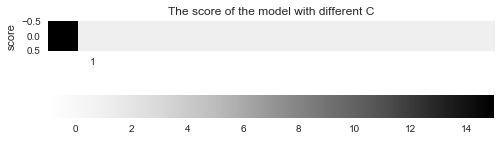

<Figure size 1800x1350 with 0 Axes>

In [58]:
from matplotlib import pyplot as plt  

plt.imshow(grid_search.cv_results_['rank_test_score'].reshape(1,-1),vmin=-1)  
plt.title("The score of the model with different C")
plt.grid()
plt.colorbar(orientation='horizontal')
plt.xticks([1])
plt.ylabel("score")
plt.figure(figsize=(12, 9),dpi=150)

# Conclusion and Future Works

Findings:\
*Data Discretization* can overcome the overfitting of the model to a specific situation. In this experiment, the explained attribute, area, was skew to 0 seriously. The baseline model can not predict well and its performance is similar to the Zeros-model in MAD and RMSE. The baseline model blindly predicted 0 and no fires in most case. After using the *Data Discretization*, the performance was improved. The trend and pattern of prediction are similar to the true label.

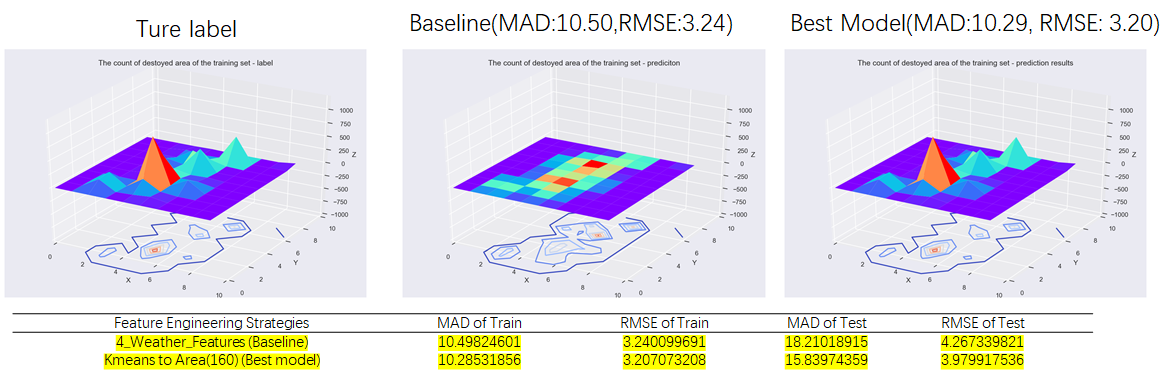

The best model:\
In this experiment, the best model was *SVC* model with 0.0 of parameter *C*. The dataset includes all attributes from the original dataset and two manual features,*Holiday, Weekend*. And the explained attribute, area, was processed by *Data Discretization* through K-means with 160 clusters.MAD and RMSE on training set were 10.285,3.21, respectively.MAD and RMSE on testing set were 15.840,3.980, respectively.
According to the indexes of MAD and RMSE and the visualization result of the model, the best model has a better index rather than the best model mentioned in the [7], and the predicted result has a similar pattern with the true label. \
So this model solved the problem satisfactorily.

# Bibliography

[1] Pedregosa F, Varoquaux G, Gramfort A, et al., Scikit-learn: Machine learning in Python., the Journal of machine Learning research, 2011\
[2] Hunter J D. Matplotlib: A 2D graphics environment, Computing in science & engineering, 2007\
[3] Lemaître G, Nogueira F, Aridas C K, Imbalanced-learn: A python toolbox to tackle the curse of imbalanced datasets in machine learning, The Journal of Machine Learning Research, 2017 \
[4] Waskom M, Botvinnik O, Ostblom J, et al., mwaskom/seaborn: v0. 10.1 (April 2020), Zenodo, 2020\
[5] Chang C C, Lin C J, LIBSVM: A library for support vector machines, ACM transactions on intelligent systems and technology (TIST), 2011\
[6] Platt J., Probabilistic outputs for support vector machines and comparisons to regularized likelihood methods, Advances in large margin classifiers, 1999\
[7] Cortez P, Morais A J R., A data mining approach to predict forest fires using meteorological data, 2007\
[8] Agarwal S, Maitrey S, Yadav P S., A Comparative Analysis of Data Mining Techniques in Wireless Sensor Network, International Journal of Computer Sciences and Engineering, 2016\
[9] Bahrepour M, van der Zwaag B J, Meratnia N, et al., Fire data analysis and feature reduction using computational intelligence methods,Advances in Intelligent Decision Technologies. Springer, Berlin, Heidelberg, 2010